# Project: Wrangling and Analyze Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gathering">Data Gathering</a></li>
<li><a href="#asess">Assessing Data</a></li>
<li><a href="#cleaning">Data Cleaing</a></li>
<li><a href="#store">Storing Data</a></li>
<li><a href="#visualize">Analyzing and Visualizing Data</a></li>
<li><a href="#conclusion">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The dataset that we will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. 


#### We will gather data from 3 different sources:-

**1- CSV file: WeRateDogs Twitter archive data (twitter_archive_enhanced.csv).**

The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which I used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." Of the 5000+ tweets, It filtered for tweets with ratings only (there are 2356).

**2- Requests library to download file: tweet image prediction (image_predictions.tsv).**

A table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).

**3- Tweepy library to query additional data via the Twitter API: (tweet_json.txt).**

Retweet count and favorite count are two of the notable column omissions. Fortunately, this additional data can be gathered by anyone from Twitter's API. Well, "anyone" who has access to data for the 3000 most recent tweets, at least.

In [68]:
# Import important packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import requests
import os
import json

<a id='gathering'></a>
## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [69]:
# load file into dataframe
df_twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [70]:
# use requests library to download the image prediction file using the link provided in the project
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url, auth=('user', 'pass'))

# save the downloaded file 
with open(url.split('/')[-1], mode = 'wb') as outfile:
    outfile.write(response.content)

# load the file into a dataframe
df_image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t', encoding = 'utf-8')

In [71]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [72]:
# Save tweet_json.txt to a dataframe

# Create a list to store the tweets from the json file

tweet_list = []

json_file = open('tweet-json.txt', "r")

for ln in json_file:
    try:
        twt = json.loads(ln)
        tweet_list.append(twt)
    except:
        continue
        
json_file.close()

# Create a dataframe

tweet_df = pd.DataFrame()

tweet_df['tweet_id'] = list(map(lambda tweet: tweet['id'], tweet_list))
tweet_df['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweet_list))
tweet_df['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweet_list))
tweet_df['created_at'] = list(map(lambda tweet: tweet['created_at'], tweet_list))
tweet_df['full_text'] = list(map(lambda tweet: tweet['full_text'], tweet_list))

In [73]:
tweet_df.head()

,tweet_id,retweet_count,favorite_count,created_at,full_text
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017,This is Tilly. She's just checking pup on you....
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,8964,42908,Sun Jul 30 15:58:51 +0000 2017,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,9774,41048,Sat Jul 29 16:00:24 +0000 2017,This is Franklin. He would like you to stop ca...


<a id='assess'></a>
## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Visual assessment:
It is simple. It involves looking at the dataset in its entirety.

In [74]:
df_twitter_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [75]:
df_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [76]:
tweet_df

,tweet_id,retweet_count,favorite_count,created_at,full_text
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017,This is Tilly. She's just checking pup on you....
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,8964,42908,Sun Jul 30 15:58:51 +0000 2017,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,9774,41048,Sat Jul 29 16:00:24 +0000 2017,This is Franklin. He would like you to stop ca...
...,...,...,...,...,...
2349,666049248165822465,41,111,Mon Nov 16 00:24:50 +0000 2015,Here we have a 1949 1st generation vulpix. Enj...
2350,666044226329800704,147,311,Mon Nov 16 00:04:52 +0000 2015,This is a purebred Piers Morgan. Loves to Netf...
2351,666033412701032449,47,128,Sun Nov 15 23:21:54 +0000 2015,Here is a very happy pup. Big fan of well-main...
2352,666029285002620928,48,132,Sun Nov 15 23:05:30 +0000 2015,This is a western brown Mitsubishi terrier. Up...


### Programmatic assessment:
Using functions and methods to reveal something about your data's quality and tidiness. 

**1- df_twitter_archive_enhanced**

In [77]:
# know some information about the columns in the dataset
df_twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [78]:
# know the num of rows and columns in the dataset
df_twitter_archive_enhanced.shape

(2356, 17)

In [79]:
# check about num of missing values in the dataset columns
df_twitter_archive_enhanced.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [80]:
# check duplicated values
df_twitter_archive_enhanced.duplicated().sum()

0

In [81]:
# check column duplicated values
df_twitter_archive_enhanced['tweet_id'].duplicated().sum()

0

In [82]:
# check column unique values
df_twitter_archive_enhanced['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [83]:
df_twitter_archive_enhanced['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [84]:
df_twitter_archive_enhanced['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [85]:
df_twitter_archive_enhanced['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [86]:
df_twitter_archive_enhanced['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [87]:
# dogs that are both doggo and floofer
df_twitter_archive_enhanced[(df_twitter_archive_enhanced.doggo == "doggo") & (df_twitter_archive_enhanced.floofer == "floofer")].shape

(1, 17)

In [88]:
# dogs that are both doggo and puppo
df_twitter_archive_enhanced[(df_twitter_archive_enhanced.doggo == "doggo") & (df_twitter_archive_enhanced.puppo == "puppo")].shape

(1, 17)

In [89]:
# dogs that are both doggo and pupper
df_twitter_archive_enhanced[(df_twitter_archive_enhanced.doggo == "doggo") & (df_twitter_archive_enhanced.pupper == "pupper")].shape

(12, 17)

In [90]:
# dogs that are both floofer and pupper
df_twitter_archive_enhanced[(df_twitter_archive_enhanced.floofer == "floofer") & (df_twitter_archive_enhanced.pupper == "pupper")].shape

(0, 17)

In [91]:
# dogs that are both floofer and puppo
df_twitter_archive_enhanced[(df_twitter_archive_enhanced.floofer == "floofer") & (df_twitter_archive_enhanced.puppo == "puppo")].shape

(0, 17)

In [92]:
# dogs that are both pupper and puppo
df_twitter_archive_enhanced[(df_twitter_archive_enhanced.pupper == "pupper") & (df_twitter_archive_enhanced.puppo == "puppo")].shape

(0, 17)

**2- df_image_predictions**

In [93]:
# know some information about the columns in the dataset
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [94]:
# know the num of rows and columns in the dataset
df_image_predictions.shape

(2075, 12)

In [95]:
# check about num of missing values in the dataset columns
df_image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [96]:
# check duplicated values
df_image_predictions.duplicated().sum()

0

In [97]:
# check column duplicated values
df_image_predictions['tweet_id'].duplicated().sum()

0

In [98]:
# check column duplicated values
df_image_predictions['jpg_url'].duplicated().sum()

66

In [99]:
df_image_predictions['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [100]:
df_image_predictions['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [101]:
df_image_predictions['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [102]:
df_image_predictions['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [103]:
# know about some statistics in the dataset columns
df_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


**3- tweet_df**

In [104]:
# know some information about the columns in the dataset
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   int64 
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
 3   created_at      2354 non-null   object
 4   full_text       2354 non-null   object
dtypes: int64(3), object(2)
memory usage: 92.1+ KB


In [105]:
# know the num of rows and columns in the dataset
tweet_df.shape

(2354, 5)

In [106]:
# check about num of missing values in the dataset columns
tweet_df.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
created_at        0
full_text         0
dtype: int64

In [107]:
# check duplicated values
tweet_df.duplicated().sum()

0

In [108]:
# check column duplicated values
tweet_df['tweet_id'].duplicated().sum()

0

### Quality issues

* **df_twitter_archive_enhanced**

1. There were 181 non-null values in [retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp] columns.

2. Unnecessary columns [in_reply_to_status_id, in_reply_to_user_id]

3. In the [name] column, it has invalid values.

4. [timestamp] is 'str' but should be 'datetime'.

5. There were dogs with more than one stage like (doggo and floofer, doggo and puppo, doggo and pupper).


* **df_image_predictions**

6. [jpg_url] has 66 duplicated values.

7. [p1], [p2], [p3] have inconsistently values as they have capital and small letters.


* **tweet_df**

8. [created_at] is 'str' but should be 'datetime'


* **General**

9. [tweet_id] is 'int' but should be 'str'.
10. The number of rows is different in the 3 tables.
11. Delete the [text] column from the merged dataset as it is found as [full_text] column in tweet_df.
12. Delete the [timestamp] column from the merged dataset as it is found as [created_at] column in the tweet_df.

### Tidiness issues
1. The 3 tables should be in a one dataset, wil merge it.

2. The dog stage is one variable and hence should form single column. But this variable is spread across 4 columns - doggo, floofer, pupper, puppo.

<a id='cleaning'></a>
## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [109]:
# Make copies of original pieces of data
tweet_arch_df = df_twitter_archive_enhanced.copy()
img_predict_df = df_image_predictions.copy()
tweet_info_df = tweet_df.copy()

### Issue #1:

#### Define:
Merge the 3 tables in only one dataset using INNER join

#### Code

In [110]:
full_tweet_df = pd.merge(tweet_arch_df, img_predict_df, how='inner', on=['tweet_id'])
full_tweet_df = pd.merge(full_tweet_df, tweet_info_df, how='inner', on=['tweet_id'])
full_tweet_df.to_csv('full_tweet.csv', encoding='utf-8')

#### Test

In [111]:
full_tweet_df.shape

(2073, 32)

In [112]:
# Make a copy from merged dataframe
full_tweet_merged_df = full_tweet_df.copy()

In [113]:
full_tweet_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  doggo                       2073 

### Issue #2:

#### Define: 
Remove retweets (text column starts with RT @) and Delete unnecessary columns [retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id, in_reply_to_user_id, timestamp, text]

#### Code

In [114]:
# Remove retweets (text column starts with RT @)
full_tweet_merged_df = full_tweet_merged_df[full_tweet_merged_df.retweeted_status_id.isnull()]
full_tweet_merged_df = full_tweet_merged_df[full_tweet_merged_df.retweeted_status_user_id.isnull()]
full_tweet_merged_df = full_tweet_merged_df[full_tweet_merged_df.retweeted_status_timestamp.isnull()]

In [115]:
# Delete unnecessary columns 
col = ['retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'in_reply_to_status_id', 
       'in_reply_to_user_id', 'timestamp', 'text']
full_tweet_merged_df = full_tweet_merged_df.drop(col, axis=1)

#### Test

In [116]:
full_tweet_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1994 non-null   int64  
 1   source              1994 non-null   object 
 2   expanded_urls       1994 non-null   object 
 3   rating_numerator    1994 non-null   int64  
 4   rating_denominator  1994 non-null   int64  
 5   name                1994 non-null   object 
 6   doggo               1994 non-null   object 
 7   floofer             1994 non-null   object 
 8   pupper              1994 non-null   object 
 9   puppo               1994 non-null   object 
 10  jpg_url             1994 non-null   object 
 11  img_num             1994 non-null   int64  
 12  p1                  1994 non-null   object 
 13  p1_conf             1994 non-null   float64
 14  p1_dog              1994 non-null   bool   
 15  p2                  1994 non-null   object 
 16  p2_con

### Issue #3:

#### Define: 
The dog stage is one variable and hence should form single column. But this variable is spread across 4 columns (doggo, floofer, pupper, puppo)

#### Code: 

In [117]:
# First replace None in stage columns with empty string as follows.
full_tweet_merged_df['doggo'].replace('None', '', inplace=True)
full_tweet_merged_df['floofer'].replace('None', '', inplace=True)
full_tweet_merged_df['pupper'].replace('None', '', inplace=True)
full_tweet_merged_df['puppo'].replace('None', '', inplace=True)

In [118]:
# Then combine stage columns.
full_tweet_merged_df['stage'] = full_tweet_merged_df['doggo'] + full_tweet_merged_df['floofer'] + full_tweet_merged_df['pupper']+ full_tweet_merged_df['puppo']

In [119]:
# Then format entries with multiple dog stages which appeared like doggopupper.

full_tweet_merged_df.loc[full_tweet_merged_df.stage == 'doggopupper', 'stage'] = 'doggo,pupper' 
full_tweet_merged_df.loc[full_tweet_merged_df.stage == 'doggopuppo', 'stage'] = 'doggo,puppo' 
full_tweet_merged_df.loc[full_tweet_merged_df.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

#### Test: 

In [120]:
full_tweet_merged_df.stage.value_counts()

                 1688
pupper            203
doggo              63
puppo              22
doggo,pupper        9
floofer             7
doggo,puppo         1
doggo,floofer       1
Name: stage, dtype: int64

### Issue #4:

#### Define: 

Convert the data type of [created_at] to 'datetime' 

#### Code: 

In [121]:
full_tweet_merged_df['created_at'] = pd.to_datetime(full_tweet_merged_df['created_at'])

#### Test: 

In [122]:
full_tweet_merged_df['created_at'].dtypes

datetime64[ns, UTC]

### Issue #5:

#### Define: 
Convert the data type of [tweet_id] to 'str'

#### Code: 

In [123]:
full_tweet_merged_df['tweet_id'] = full_tweet_merged_df['tweet_id'].astype(str)

#### Test: 

In [124]:
full_tweet_merged_df['tweet_id'].dtypes

dtype('O')

### Issue #6:

#### Define: 
Capitalize and remove underscore in [p1], [p2], [p3] columns

#### Code: 

In [125]:
# replace underscore to space

full_tweet_merged_df['p1'] = full_tweet_merged_df['p1'].str.replace('_', ' ')
full_tweet_merged_df['p2'] = full_tweet_merged_df['p1'].str.replace('_', ' ')
full_tweet_merged_df['p3'] = full_tweet_merged_df['p1'].str.replace('_', ' ')

In [126]:
# capitalize values in these columns

full_tweet_merged_df['p1'] = full_tweet_merged_df['p1'].str.title()
full_tweet_merged_df['p2'] = full_tweet_merged_df['p1'].str.title()
full_tweet_merged_df['p3'] = full_tweet_merged_df['p1'].str.title()

#### Test: 

In [127]:
full_tweet_merged_df[['p1', 'p2', 'p3']].head()

,p1,p2,p3
0,Orange,Orange,Orange
1,Chihuahua,Chihuahua,Chihuahua
2,Chihuahua,Chihuahua,Chihuahua
3,Paper Towel,Paper Towel,Paper Towel
4,Basset,Basset,Basset


### Issue #7:

#### Define: 
In the [name] column, there were invalid values.

#### Code: 

In [128]:
# dealing with invalid values
mask = full_tweet_merged_df.name.str.islower() 
column_name = 'name' 
full_tweet_merged_df.loc[mask, column_name] = np.nan

#### Test: 

In [129]:
full_tweet_merged_df['name'].value_counts()

None       546
Charlie     11
Lucy        10
Oliver      10
Cooper      10
          ... 
Deacon       1
Bones        1
Maude        1
Rose         1
Gromit       1
Name: name, Length: 914, dtype: int64

#### Code: 

In [138]:
# dealing with 'None' values
full_tweet_merged_df['name'].replace('None', np.nan, inplace=True)

In [139]:
full_tweet_merged_df.isnull().sum()

tweet_id                0
source                  0
expanded_urls           0
rating_numerator        0
rating_denominator      0
name                  546
doggo                   0
floofer                 0
pupper                  0
puppo                   0
jpg_url                 0
img_num                 0
p1                      0
p1_conf                 0
p1_dog                  0
p2                      0
p2_conf                 0
p2_dog                  0
p3                      0
p3_conf                 0
p3_dog                  0
retweet_count           0
favorite_count          0
created_at              0
full_text               0
stage                   0
dtype: int64

In [140]:
# drop null values
full_tweet_merged_df = full_tweet_merged_df.dropna()

#### Test: 

In [141]:
full_tweet_merged_df.isnull().sum()

tweet_id              0
source                0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
jpg_url               0
img_num               0
p1                    0
p1_conf               0
p1_dog                0
p2                    0
p2_conf               0
p2_dog                0
p3                    0
p3_conf               0
p3_dog                0
retweet_count         0
favorite_count        0
created_at            0
full_text             0
stage                 0
dtype: int64

<a id='store'></a>
## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [142]:
full_tweet_merged_df.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

<a id='visualize'></a>
## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

1. **The most common dog names: Charlie, Lucy, Cooper, Oliver.**

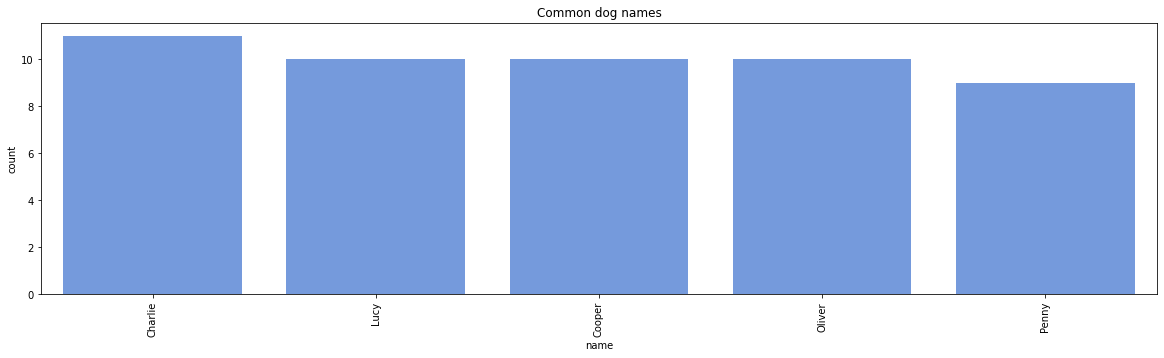

In [160]:
plt.figure(figsize=(20,5))
ax = sns.countplot(data=full_tweet_merged_df,x='name', order=full_tweet_merged_df['name'].value_counts().iloc[:5].index, color ='#6495ED')
plt.xticks(rotation=90)
plt.title("Common dog names")
plt.show()

2- **The most dog tweet has name (Duddles) which got the biggest number of favourited (107956) and (45849) retweeted**

In [144]:
full_tweet_merged_df[full_tweet_merged_df['favorite_count'] == full_tweet_merged_df['favorite_count'].max()]

,tweet_id,source,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,created_at,full_text,stage
59,879415818425184262,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/879415818...,13,10,Duddles,,,,,...,0.134967,True,English Springer,0.110481,True,45849,107956,2017-06-26 19:07:24+00:00,This is Duddles. He did an attempt. 13/10 some...,


**3- The dog tweet has name (Stephan) which got (107015) favourited and largest number of retweeted (56625)**

In [146]:
full_tweet_merged_df[full_tweet_merged_df['retweet_count'] == full_tweet_merged_df['retweet_count'].max()]

,tweet_id,source,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,created_at,full_text,stage
432,807106840509214720,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,,,,,...,0.120358,True,Chihuahua,0.077008,True,56625,107015,2016-12-09 06:17:20+00:00,This is Stephan. He just wants to help. 13/10 ...,


**4- 50% of rating numerator is (11) and rating denominator is (10)**

In [147]:
full_tweet_merged_df.describe()

,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,1350.000000,1350.000000,1350.000000,1350.000000,1.350000e+03,1.350000e+03,1350.000000,1350.000000
mean,12.111111,10.028148,1.210370,0.600782,1.337624e-01,6.048425e-02,2752.082963,9408.368889
std,48.127821,1.092101,0.573865,0.274173,1.007687e-01,5.166954e-02,3968.021185,11681.864003
min,2.000000,7.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,23.000000,107.000000
25%,10.000000,10.000000,1.000000,0.367480,5.142930e-02,1.540840e-02,708.250000,2369.250000
50%,11.000000,10.000000,1.000000,0.599923,1.178275e-01,4.922740e-02,1542.500000,4897.500000
75%,12.000000,10.000000,1.000000,0.868634,1.973900e-01,9.407000e-02,3354.500000,12327.000000
max,1776.000000,50.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,56625.000000,107956.000000


**5- The most common stage in dogs is Pupper** 

In [148]:
full_tweet_merged_df['stage'].value_counts()

                1173
pupper           117
doggo             36
puppo             15
floofer            5
doggo,pupper       4
Name: stage, dtype: int64

In [151]:
pupper_percentage = full_tweet_merged_df['stage'].value_counts()[1]/full_tweet_merged_df.shape[0]*100
doggo_percentage = full_tweet_merged_df['stage'].value_counts()[2]/full_tweet_merged_df.shape[0]*100
puppo_percentage = full_tweet_merged_df['stage'].value_counts()[3]/full_tweet_merged_df.shape[0]*100
floofer_percentage = full_tweet_merged_df['stage'].value_counts()[4]/full_tweet_merged_df.shape[0]*100

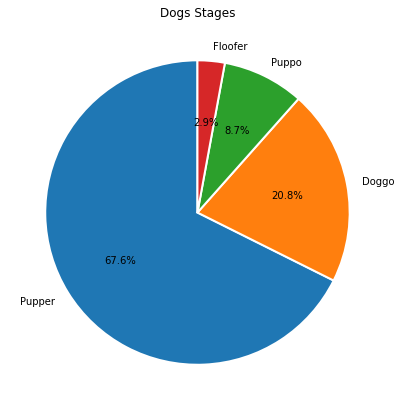

In [154]:
data = [pupper_percentage, doggo_percentage, puppo_percentage, floofer_percentage]
labels = ['Pupper', 'Doggo', 'Puppo', 'Floofer']

plt.figure(figsize=(7,7))
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=90,wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' })
plt.title("Dogs Stages")
plt.show()

<a id='conclusion'></a>
## Conclusions:

1- The most common dog names: **Charlie, Lucy, Cooper, Oliver.**

2- The most dog tweet has name **(Duddles)** which got the biggest number of favourited **(107956)** and **(45849)** retweeted.

3- The dog tweet has name **(Stephan)** which got **(107015)** favourited and largest number of retweeted **(56625)**.

4- **50%** of rating numerator is **(11)** and rating denominator is **(10)**.

5- The most common stage in dogs is **Pupper**.